In [147]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 84

# 各パス指定

In [148]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_2hands.h5'

# 分類数設定

In [149]:
NUM_CLASSES = 3

# 学習データ読み込み

In [150]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 4) + 1)))

In [151]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [153]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 4, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [154]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,943 (7.59 KB)

 Trainable params: 1,943 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [156]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [157]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.3828 - loss: 1.0776
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3869 - loss: 1.0771 - val_accuracy: 0.7222 - val_loss: 0.9298
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0180
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5123 - loss: 1.0059 - val_accuracy: 0.8333 - val_loss: 0.9060
Epoch 3/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6172 - loss: 0.9624
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5967 - loss: 0.9741 - val_accuracy: 0.8333 - val_loss: 0.8793
Epoch 4/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6328 - loss: 0.9350
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6348 - loss: 0.9234 - val_accuracy: 0.8333 - val_loss: 0.8527
Epoch 5/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6484 - loss: 0.8847
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6524 - loss: 0.8849 - val_accuracy: 0.8333 - val_loss: 0.8244
Epoch 6/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6328 - loss: 0.8776
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6595 - loss: 0.8646 - val_accuracy: 0.8333 - val_loss: 0.7942
Epoch 7/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6484 - loss: 0.8426
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6853 - loss: 0.8167 - val_accuracy: 0.8333 - val_loss: 0.7605
Epoch 8/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.7717
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7681 - loss: 0.7754 - val_accuracy: 0.8333 - val_loss: 0.7266
Epoch 9/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.7748
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7644 - loss: 0.7645 - val_accuracy: 0.8333 - val_loss: 0.6939
Epoch 10/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.6784
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7804 - loss: 0.6756 - val_accuracy: 0.8333 - val_loss: 0.6623
Epoch 11/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7344 - loss: 0.6972
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7386 - loss: 0.6905 - val_accuracy: 0.8333 - val_loss: 0.6323
Epoch 12/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7422 - loss: 0.6844
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7618 - loss: 0.6712 - val_accuracy: 0.8333 - val_loss: 0.6042
Epoch 13/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.6180
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7950 - loss: 0.6164 - val_accuracy: 0.8333 - val_loss: 0.5780
Epoch 14/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7578 - loss: 0.6162
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7464 - loss: 0.6235 - val_accuracy: 0.8333 - val_loss: 0.5545
Epoch 15/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8125 - loss: 0.5517
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8182 - loss: 0.5484 - val_accuracy: 0.8333 - val_loss: 0.5333
Epoch 16/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8047 - loss: 0.5815
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8156 - loss: 0.5714 - val_accuracy: 0.8333 - val_loss: 0.5133
Epoch 17/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6551
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7809 - loss: 0.6114 - val_accuracy: 0.8333 - val_loss: 0.4957
Epoch 18/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8281 - loss: 0.5380
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8316 - loss: 0.5469 - val_accuracy: 0.8333 - val_loss: 0.4797
Epoch 19/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8516 - loss: 0.4796
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8476 - loss: 0.4816 - val_accuracy: 0.8333 - val_loss: 0.4643
Epoch 20/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8203 - loss: 0.4706
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8208 - loss: 0.4837 - val_accuracy: 0.8333 - val_loss: 0.4495
Epoch 21/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.4532
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8461 - loss: 0.4561 - val_accuracy: 0.8333 - val_loss: 0.4354
Epoch 22/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.4866
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8492 - loss: 0.4755 - val_accuracy: 0.8333 - val_loss: 0.4225
Epoch 23/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8672 - loss: 0.4114
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8487 - loss: 0.4294 - val_accuracy: 0.8333 - val_loss: 0.4111
Epoch 24/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8672 - loss: 0.4185
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8652 - loss: 0.4251 - val_accuracy: 0.8333 - val_loss: 0.4000
Epoch 25/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.4517
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8357 - loss: 0.4465 - val_accuracy: 0.8333 - val_loss: 0.3887
Epoch 26/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8594 - loss: 0.4566
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8544 - loss: 0.4600 - val_accuracy: 0.8333 - val_loss: 0.3784
Epoch 27/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8281 - loss: 0.4664
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8398 - loss: 0.4444 - val_accuracy: 0.8333 - val_loss: 0.3689
Epoch 28/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.4260
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8518 - loss: 0.4163 - val_accuracy: 0.8333 - val_loss: 0.3602
Epoch 29/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8516 - loss: 0.4029
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8518 - loss: 0.4083 - val_accuracy: 0.8333 - val_loss: 0.3524
Epoch 30/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.3486
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8827 - loss: 0.3576 - val_accuracy: 0.8519 - val_loss: 0.3445
Epoch 31/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.4005
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8533 - loss: 0.3796 - val_accuracy: 0.8519 - val_loss: 0.3362
Epoch 32/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8516 - loss: 0.3733
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8518 - loss: 0.3680 - val_accuracy: 0.8519 - val_loss: 0.3282
Epoch 33/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.3797
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8749 - loss: 0.3573 - val_accuracy: 0.8704 - val_loss: 0.3208
Epoch 34/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8594 - loss: 0.3581
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8585 - loss: 0.3571 - val_accuracy: 0.9074 - val_loss: 0.3143
Epoch 35/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3453
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8719 - loss: 0.3529 - val_accuracy: 0.9074 - val_loss: 0.3078
Epoch 36/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.3029
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8704 - loss: 0.3269 - val_accuracy: 0.9074 - val_loss: 0.3020
Epoch 37/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3616
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8801 - loss: 0.3560 - val_accuracy: 0.9074 - val_loss: 0.2966
Epoch 38/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.3387
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8786 - loss: 0.3313 - val_accuracy: 0.9074 - val_loss: 0.2914
Epoch 39/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.3882
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8626 - loss: 0.3806 - val_accuracy: 0.9074 - val_loss: 0.2859
Epoch 40/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9219 - loss: 0.2904
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9122 - loss: 0.3083 - val_accuracy: 0.9074 - val_loss: 0.2799
Epoch 41/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.3579
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8585 - loss: 0.3573 - val_accuracy: 0.9074 - val_loss: 0.2725
Epoch 42/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.3114
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9003 - loss: 0.3136 - val_accuracy: 0.9074 - val_loss: 0.2638
Epoch 43/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.2947
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8719 - loss: 0.3117 - val_accuracy: 0.9074 - val_loss: 0.2546
Epoch 44/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.2889
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8801 - loss: 0.2930 - val_accuracy: 0.9074 - val_loss: 0.2456
Epoch 45/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8828 - loss: 0.3301
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8951 - loss: 0.3153 - val_accuracy: 0.9074 - val_loss: 0.2386
Epoch 46/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9297 - loss: 0.2355
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9231 - loss: 0.2597 - val_accuracy: 0.9074 - val_loss: 0.2324
Epoch 47/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.2928
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8951 - loss: 0.2774 - val_accuracy: 0.9074 - val_loss: 0.2266
Epoch 48/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3015
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8843 - loss: 0.2853 - val_accuracy: 0.9074 - val_loss: 0.2218
Epoch 49/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8906 - loss: 0.2798
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8854 - loss: 0.2910 - val_accuracy: 0.9074 - val_loss: 0.2167
Epoch 50/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.2418
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9216 - loss: 0.2574 - val_accuracy: 0.9074 - val_loss: 0.2111
Epoch 51/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9141 - loss: 0.2425
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9137 - loss: 0.2410 - val_accuracy: 0.9074 - val_loss: 0.2056
Epoch 52/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.2485
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8962 - loss: 0.2514 - val_accuracy: 0.9074 - val_loss: 0.2009
Epoch 53/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.2264
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9298 - loss: 0.2310 - val_accuracy: 0.9074 - val_loss: 0.1964
Epoch 54/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9297 - loss: 0.2407
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9272 - loss: 0.2371 - val_accuracy: 0.9074 - val_loss: 0.1927
Epoch 55/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8906 - loss: 0.2664
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8977 - loss: 0.2490 - val_accuracy: 0.9074 - val_loss: 0.1894
Epoch 56/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9141 - loss: 0.2450
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9137 - loss: 0.2475 - val_accuracy: 0.9074 - val_loss: 0.1865
Epoch 57/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9141 - loss: 0.2598
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9179 - loss: 0.2472 - val_accuracy: 0.9074 - val_loss: 0.1834
Epoch 58/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8828 - loss: 0.2447
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8951 - loss: 0.2309 - val_accuracy: 0.9074 - val_loss: 0.1809
Epoch 59/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.2230
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9231 - loss: 0.2247 - val_accuracy: 0.9074 - val_loss: 0.1785
Epoch 60/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.2459
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8910 - loss: 0.2299 - val_accuracy: 0.9074 - val_loss: 0.1759
Epoch 61/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.2098
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9153 - loss: 0.2050 - val_accuracy: 0.9074 - val_loss: 0.1736
Epoch 62/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9141 - loss: 0.2216
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9220 - loss: 0.2125 - val_accuracy: 0.9074 - val_loss: 0.1709
Epoch 63/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.1843
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9272 - loss: 0.1886 - val_accuracy: 0.9074 - val_loss: 0.1675
Epoch 64/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.2279
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9354 - loss: 0.2189 - val_accuracy: 0.9074 - val_loss: 0.1639
Epoch 65/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9219 - loss: 0.1903
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9122 - loss: 0.2015 - val_accuracy: 0.9074 - val_loss: 0.1601
Epoch 66/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9219 - loss: 0.2243
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9287 - loss: 0.2118 - val_accuracy: 0.9074 - val_loss: 0.1558
Epoch 67/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.1886
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9380 - loss: 0.1896 - val_accuracy: 0.9074 - val_loss: 0.1516
Epoch 68/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.2341
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9194 - loss: 0.2160 - val_accuracy: 0.9074 - val_loss: 0.1479
Epoch 69/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8906 - loss: 0.2316
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8977 - loss: 0.2225 - val_accuracy: 0.9074 - val_loss: 0.1446
Epoch 70/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9141 - loss: 0.2190
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9220 - loss: 0.2088 - val_accuracy: 0.9074 - val_loss: 0.1416
Epoch 71/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9453 - loss: 0.1800
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9447 - loss: 0.1866 - val_accuracy: 0.9259 - val_loss: 0.1384
Epoch 72/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.1741
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9380 - loss: 0.1843 - val_accuracy: 0.9259 - val_loss: 0.1351
Epoch 73/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1891
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9365 - loss: 0.2017 - val_accuracy: 0.9259 - val_loss: 0.1318
Epoch 74/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.2196
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9070 - loss: 0.2224 - val_accuracy: 0.9444 - val_loss: 0.1292
Epoch 75/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1639
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9488 - loss: 0.1712 - val_accuracy: 0.9444 - val_loss: 0.1274
Epoch 76/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.1777
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9313 - loss: 0.1782 - val_accuracy: 0.9444 - val_loss: 0.1257
Epoch 77/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9219 - loss: 0.2095
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9287 - loss: 0.2008 - val_accuracy: 0.9444 - val_loss: 0.1243
Epoch 78/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.2109
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9194 - loss: 0.1964 - val_accuracy: 0.9444 - val_loss: 0.1232
Epoch 79/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1541
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9556 - loss: 0.1537 - val_accuracy: 0.9444 - val_loss: 0.1222
Epoch 80/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.1668
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9272 - loss: 0.1737 - val_accuracy: 0.9444 - val_loss: 0.1212
Epoch 81/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9141 - loss: 0.1601
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9179 - loss: 0.1620 - val_accuracy: 0.9444 - val_loss: 0.1195
Epoch 82/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.1768
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9354 - loss: 0.1714 - val_accuracy: 0.9444 - val_loss: 0.1173
Epoch 83/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.1479
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9421 - loss: 0.1417 - val_accuracy: 0.9444 - val_loss: 0.1146
Epoch 84/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9219 - loss: 0.2225
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9246 - loss: 0.2126 - val_accuracy: 0.9444 - val_loss: 0.1122
Epoch 85/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1317
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9664 - loss: 0.1245 - val_accuracy: 0.9630 - val_loss: 0.1099
Epoch 86/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.1163
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.1140 - val_accuracy: 0.9630 - val_loss: 0.1077
Epoch 87/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9297 - loss: 0.1598
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9395 - loss: 0.1476 - val_accuracy: 0.9630 - val_loss: 0.1057
Epoch 88/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1194
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9541 - loss: 0.1285 - val_accuracy: 0.9630 - val_loss: 0.1036
Epoch 89/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9453 - loss: 0.1760
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9365 - loss: 0.1894 - val_accuracy: 0.9630 - val_loss: 0.1010
Epoch 90/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1400
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9690 - loss: 0.1404 - val_accuracy: 0.9815 - val_loss: 0.0981
Epoch 91/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1268
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9556 - loss: 0.1236 - val_accuracy: 0.9815 - val_loss: 0.0956
Epoch 92/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1341
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9649 - loss: 0.1383 - val_accuracy: 0.9815 - val_loss: 0.0933
Epoch 93/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9531 - loss: 0.1491
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9473 - loss: 0.1620 - val_accuracy: 0.9815 - val_loss: 0.0911
Epoch 94/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.1624
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9339 - loss: 0.1670 - val_accuracy: 0.9815 - val_loss: 0.0890
Epoch 95/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1594
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9597 - loss: 0.1480 - val_accuracy: 0.9815 - val_loss: 0.0873
Epoch 96/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.1518
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9380 - loss: 0.1456 - val_accuracy: 0.9815 - val_loss: 0.0855
Epoch 97/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9453 - loss: 0.1502
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9447 - loss: 0.1427 - val_accuracy: 0.9815 - val_loss: 0.0838
Epoch 98/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9453 - loss: 0.1296
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9530 - loss: 0.1213 - val_accuracy: 0.9815 - val_loss: 0.0820
Epoch 99/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1397
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9623 - loss: 0.1417 - val_accuracy: 0.9815 - val_loss: 0.0801
Epoch 100/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9297 - loss: 0.1456
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9395 - loss: 0.1310 - val_accuracy: 0.9815 - val_loss: 0.0785
Epoch 101/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1005
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9608 - loss: 0.1117 - val_accuracy: 0.9815 - val_loss: 0.0764
Epoch 102/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1361
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9582 - loss: 0.1336 - val_accuracy: 0.9815 - val_loss: 0.0739
Epoch 103/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1432
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9488 - loss: 0.1307 - val_accuracy: 1.0000 - val_loss: 0.0717
Epoch 104/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.1311
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9421 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 0.0700
Epoch 105/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.1237
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9757 - loss: 0.1265 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 106/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.1866
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9044 - loss: 0.1833 - val_accuracy: 1.0000 - val_loss: 0.0676
Epoch 107/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9297 - loss: 0.1675
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9395 - loss: 0.1542 - val_accuracy: 1.0000 - val_loss: 0.0671
Epoch 108/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1294
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9515 - loss: 0.1292 - val_accuracy: 1.0000 - val_loss: 0.0671
Epoch 109/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1105
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9541 - loss: 0.1221 - val_accuracy: 1.0000 - val_loss: 0.0669
Epoch 110/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1044
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9664 - loss: 0.0967 - val_accuracy: 1.0000 - val_loss: 0.0664
Epoch 111/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1288
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9530 - loss: 0.1223 - val_accuracy: 1.0000 - val_loss: 0.0654
Epoch 112/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1128
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9597 - loss: 0.1036 - val_accuracy: 1.0000 - val_loss: 0.0640
Epoch 113/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1325
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9556 - loss: 0.1290 - val_accuracy: 1.0000 - val_loss: 0.0628
Epoch 114/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1138
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9515 - loss: 0.1139 - val_accuracy: 1.0000 - val_loss: 0.0618
Epoch 115/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1400
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9530 - loss: 0.1350 - val_accuracy: 1.0000 - val_loss: 0.0603
Epoch 116/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1039
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9690 - loss: 0.1179 - val_accuracy: 1.0000 - val_loss: 0.0581
Epoch 117/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0839
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9649 - loss: 0.0936 - val_accuracy: 1.0000 - val_loss: 0.0553
Epoch 118/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1005
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9731 - loss: 0.0935 - val_accuracy: 1.0000 - val_loss: 0.0530
Epoch 119/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9453 - loss: 0.1181
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9530 - loss: 0.1105 - val_accuracy: 1.0000 - val_loss: 0.0513
Epoch 120/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9609 - loss: 0.1039
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9664 - loss: 0.0983 - val_accuracy: 1.0000 - val_loss: 0.0497
Epoch 121/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1111
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9664 - loss: 0.1044 - val_accuracy: 1.0000 - val_loss: 0.0485
Epoch 122/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0900
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9757 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 0.0471
Epoch 123/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9609 - loss: 0.1139
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9623 - loss: 0.1090 - val_accuracy: 1.0000 - val_loss: 0.0459
Epoch 124/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0965
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9731 - loss: 0.0978 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 125/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9609 - loss: 0.1121
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9664 - loss: 0.1068 - val_accuracy: 1.0000 - val_loss: 0.0449
Epoch 126/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1037
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9731 - loss: 0.0952 - val_accuracy: 1.0000 - val_loss: 0.0448
Epoch 127/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0980
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9716 - loss: 0.0962 - val_accuracy: 1.0000 - val_loss: 0.0450
Epoch 128/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1042
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9597 - loss: 0.0967 - val_accuracy: 1.0000 - val_loss: 0.0454
Epoch 129/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1230
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9664 - loss: 0.1092 - val_accuracy: 1.0000 - val_loss: 0.0462
Epoch 130/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.0979
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9623 - loss: 0.0970 - val_accuracy: 1.0000 - val_loss: 0.0469
Epoch 131/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0731
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9824 - loss: 0.0739 - val_accuracy: 1.0000 - val_loss: 0.0473
Epoch 132/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1037
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9473 - loss: 0.1137 - val_accuracy: 1.0000 - val_loss: 0.0467
Epoch 133/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.0911
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9608 - loss: 0.0939 - val_accuracy: 1.0000 - val_loss: 0.0456
Epoch 134/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9609 - loss: 0.1062
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9623 - loss: 0.1007 - val_accuracy: 1.0000 - val_loss: 0.0442
Epoch 135/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9609 - loss: 0.1237
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9664 - loss: 0.1143 - val_accuracy: 1.0000 - val_loss: 0.0429
Epoch 136/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0569
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9866 - loss: 0.0585 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 137/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0671
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9824 - loss: 0.0723 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 138/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.1089
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9608 - loss: 0.1181 - val_accuracy: 1.0000 - val_loss: 0.0390
Epoch 139/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.1082
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9690 - loss: 0.1039 - val_accuracy: 1.0000 - val_loss: 0.0385
Epoch 140/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.1112
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.1003 - val_accuracy: 1.0000 - val_loss: 0.0380
Epoch 141/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9531 - loss: 0.1170
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9597 - loss: 0.1080 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 142/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1201
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9432 - loss: 0.1380 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 143/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1056
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9541 - loss: 0.1156 - val_accuracy: 1.0000 - val_loss: 0.0373
Epoch 144/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0737
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0365
Epoch 145/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0623
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9866 - loss: 0.0607 - val_accuracy: 1.0000 - val_loss: 0.0357
Epoch 146/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0758
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9824 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0349
Epoch 147/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.0884
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9623 - loss: 0.0924 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 148/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.0831
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9623 - loss: 0.0834 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 149/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0815
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9757 - loss: 0.0823 - val_accuracy: 1.0000 - val_loss: 0.0333
Epoch 150/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0683
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9608 - loss: 0.0796 - val_accuracy: 1.0000 - val_loss: 0.0327
Epoch 151/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9688 - loss: 0.0712
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9690 - loss: 0.0754 - val_accuracy: 1.0000 - val_loss: 0.0319
Epoch 152/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0540
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9675 - loss: 0.0718 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 153/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0603
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9892 - loss: 0.0643 - val_accuracy: 1.0000 - val_loss: 0.0310
Epoch 154/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0638
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0306
Epoch 155/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0733
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9649 - loss: 0.0801 - val_accuracy: 1.0000 - val_loss: 0.0305
Epoch 156/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0789
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9757 - loss: 0.0865 - val_accuracy: 1.0000 - val_loss: 0.0308
Epoch 157/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0694
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0693 - val_accuracy: 1.0000 - val_loss: 0.0311
Epoch 158/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0646
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9757 - loss: 0.0687 - val_accuracy: 1.0000 - val_loss: 0.0317
Epoch 159/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.1018
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9597 - loss: 0.0924 - val_accuracy: 1.0000 - val_loss: 0.0326
Epoch 160/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0805
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.0751 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 161/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0556
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 162/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0747
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9798 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 163/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.0851
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 164/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0800
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9798 - loss: 0.0717 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 165/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0633
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.0657 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 166/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.1154
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9731 - loss: 0.1024 - val_accuracy: 1.0000 - val_loss: 0.0328
Epoch 167/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0687
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9742 - loss: 0.0892 - val_accuracy: 1.0000 - val_loss: 0.0315
Epoch 168/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0634
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9798 - loss: 0.0628 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 169/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0719
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0672 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 170/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0620
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0582 - val_accuracy: 1.0000 - val_loss: 0.0281
Epoch 171/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9844 - loss: 0.0750
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9866 - loss: 0.0692 - val_accuracy: 1.0000 - val_loss: 0.0272
Epoch 172/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0550
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9783 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 173/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0545
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0523 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 174/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0685
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 175/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9531 - loss: 0.0857
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9556 - loss: 0.0837 - val_accuracy: 1.0000 - val_loss: 0.0248
Epoch 176/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0552
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9675 - loss: 0.0690 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 177/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0733
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9690 - loss: 0.0756 - val_accuracy: 1.0000 - val_loss: 0.0241
Epoch 178/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0559
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0529 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 179/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0675
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9731 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 180/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0663
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9798 - loss: 0.0597 - val_accuracy: 1.0000 - val_loss: 0.0224
Epoch 181/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0561
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0219
Epoch 182/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0469
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9783 - loss: 0.0589 - val_accuracy: 1.0000 - val_loss: 0.0216
Epoch 183/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0398
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9892 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 0.0214
Epoch 184/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0586
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9757 - loss: 0.0639 - val_accuracy: 1.0000 - val_loss: 0.0212
Epoch 185/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9688 - loss: 0.0830
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9731 - loss: 0.0773 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 186/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0447
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9824 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 187/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0689
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9798 - loss: 0.0660 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 188/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.0970
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9530 - loss: 0.0900 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 189/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0727
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9716 - loss: 0.0768 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 190/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0520
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 191/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0453
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9933 - loss: 0.0455 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 192/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0622
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9757 - loss: 0.0621 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 193/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0396
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9768 - loss: 0.0662 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 194/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9922 - loss: 0.0247
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9933 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0201
Epoch 195/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0553
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9851 - loss: 0.0603 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 196/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0836
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9798 - loss: 0.0739 - val_accuracy: 1.0000 - val_loss: 0.0209
Epoch 197/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0652
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0597 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 198/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0709
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0667 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 199/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0508
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9866 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0209
Epoch 200/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0598
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 201/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0520
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9892 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0201
Epoch 202/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0258
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0193
Epoch 203/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0720
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9824 - loss: 0.0702 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 204/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0761
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0748 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 205/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0466
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9892 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 206/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0663
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9742 - loss: 0.0759 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 207/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0712
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9892 - loss: 0.0709 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 208/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0327
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 209/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0547
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9757 - loss: 0.0598 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 210/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0510
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9824 - loss: 0.0511 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 211/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0302
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 212/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0466
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9824 - loss: 0.0478 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 213/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0340
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 214/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0647
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9866 - loss: 0.0629 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 215/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0352
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9933 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 216/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0607
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0564 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 217/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0480
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 218/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0400
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 219/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0350
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0336 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 220/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0417
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9933 - loss: 0.0394 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 221/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0559
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9798 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 222/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0698
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9716 - loss: 0.0728 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 223/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0411
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 224/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0391
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9892 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 225/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0401
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 226/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0440
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0485 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 227/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0748
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0706 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 228/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0247
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0259 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 229/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0520
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9866 - loss: 0.0484 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 230/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0249
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 231/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.0785
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9664 - loss: 0.0724 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 232/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0641
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9824 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 233/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0345
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 234/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0414
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0380 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 235/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0532
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9866 - loss: 0.0493 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 236/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0380
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9866 - loss: 0.0377 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 237/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0431
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9798 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 238/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9844 - loss: 0.0652
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9824 - loss: 0.0625 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 239/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0351
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9933 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 240/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0901
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9731 - loss: 0.0796 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 241/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0597
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9798 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 242/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0574
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9892 - loss: 0.0584 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 243/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0335
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9892 - loss: 0.0362 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 244/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0447
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9742 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 245/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0481
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 246/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0667
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0597 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 247/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0746
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9649 - loss: 0.0792 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 248/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0497
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9690 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 249/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.0705
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9798 - loss: 0.0637 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 250/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.0490
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9690 - loss: 0.0518 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 251/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9766 - loss: 0.0558
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9798 - loss: 0.0497 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 252/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9922 - loss: 0.0398
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier_2hands.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 252: early stopping


In [158]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0105


In [159]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [160]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[3.1103335e-07 9.9999940e-01 2.1127497e-07]
1


# 混同行列

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


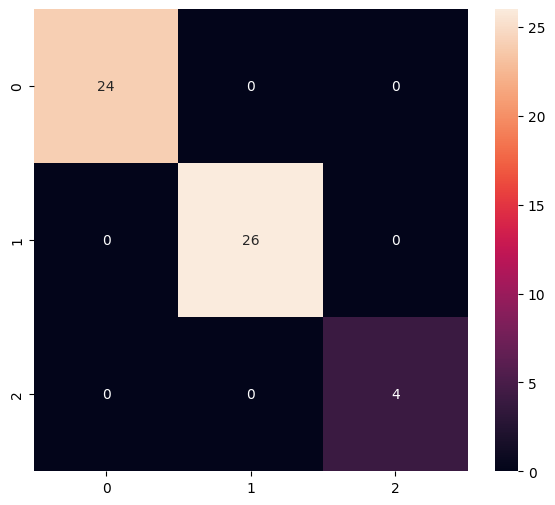

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         4

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [162]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [163]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/_f/jdnv181d3hdbxhcpc1wx28nw0000gn/T/tmpuhescm1e/assets


INFO:tensorflow:Assets written to: /var/folders/_f/jdnv181d3hdbxhcpc1wx28nw0000gn/T/tmpuhescm1e/assets


Saved artifact at '/var/folders/_f/jdnv181d3hdbxhcpc1wx28nw0000gn/T/tmpuhescm1e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 84), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  13152207888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13152217104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13152208464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13152218064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13152218448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13152208080: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1742532934.901326 18337951 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1742532934.901617 18337951 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


5176

# 推論テスト

In [164]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [165]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [166]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [167]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 143 μs, sys: 136 μs, total: 279 μs
Wall time: 224 μs


In [168]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.0747219e-07 9.9999940e-01 2.0990069e-07]
1
